In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

C:\Users\JOSH\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\JOSH\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\JOSH\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv("IBM Attrition Data.csv")
df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [3]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [4]:
df.shape

(1470, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [6]:
df.nunique()

Age                          43
Attrition                     2
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EnvironmentSatisfaction       4
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
WorkLifeBalance               4
YearsAtCompany               37
dtype: int64

In [7]:
df.isnull().any()

Age                        False
Attrition                  False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EnvironmentSatisfaction    False
JobSatisfaction            False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
WorkLifeBalance            False
YearsAtCompany             False
dtype: bool

In [8]:
def education(num):
    if num == 1:
        return "Below College"
    elif num == 2:
        return "College"
    elif num == 3:
        return"Bachelor"
    elif num == 4:
        return"Master"
    else:
        return"Doctor"

def env_satisfaction(env):
    if env == 1:
        return "Low"
    elif env == 2:
        return "Medium"
    elif env == 3:
        return"High"
    else:
        return"Very High"

In [9]:
df['Education'] = df['Education'].apply(education)

In [10]:
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].apply(env_satisfaction)

In [11]:
df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,College,Life Sciences,Medium,4,Single,5993,8,1,6
1,49,No,Research & Development,8,Below College,Life Sciences,High,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,College,Other,Very High,3,Single,2090,6,3,0
3,33,No,Research & Development,3,Master,Life Sciences,Very High,3,Married,2909,1,3,8
4,27,No,Research & Development,2,Below College,Medical,Low,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,College,Medical,High,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,Below College,Medical,Very High,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,Bachelor,Life Sciences,Medium,2,Married,6142,1,3,6
1468,49,No,Sales,2,Bachelor,Medical,Very High,2,Married,5390,2,2,9


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


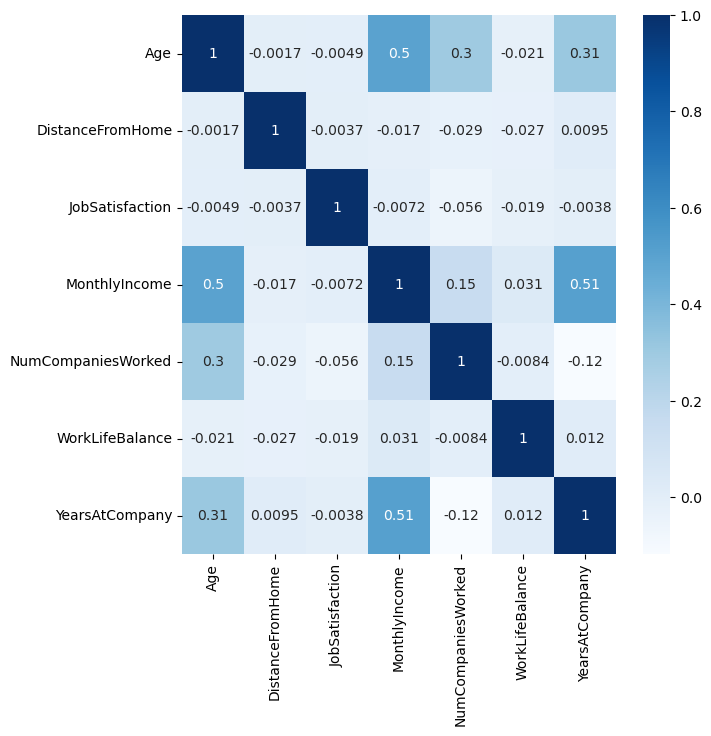

In [13]:
plt.figure(figsize=[7,7])
sns.heatmap(data=df.corr(), annot=True, cmap='Blues')
plt.show()

In [14]:
df_m= df.groupby("MaritalStatus")
df_m.size()

MaritalStatus
Divorced    327
Married     673
Single      470
dtype: int64

In [15]:
num=[x for x in df if df[x].dtype=="O"]
num

['Attrition',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'MaritalStatus']

In [16]:
cat=[x for x in df if df[x].dtype!="O"]
cat

['Age',
 'DistanceFromHome',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'WorkLifeBalance',
 'YearsAtCompany']

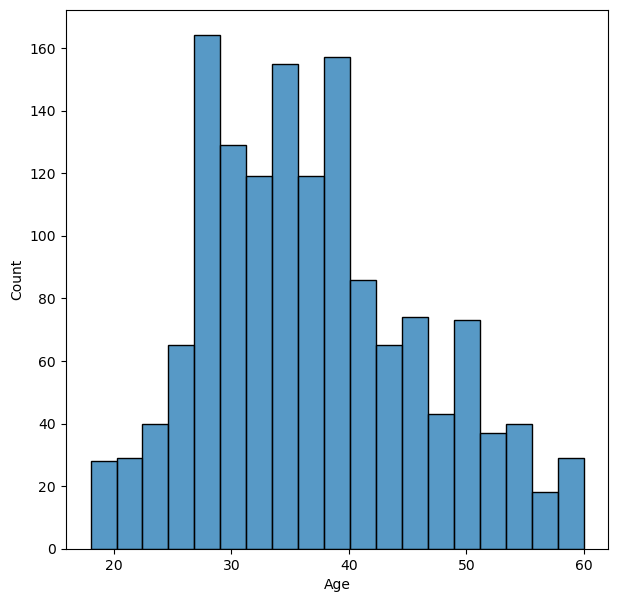

In [17]:
# Age distribution of employees
plt.figure(figsize=[7,7])
sns.histplot(df["Age"])
plt.show()

##### 
       Exploring Customers that have left

In [18]:
attr=df[df["Attrition"]=="Yes"]

In [19]:
attr.describe()

,Age,DistanceFromHome,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,10.632911,2.468354,4787.092827,2.940928,2.658228,5.130802
std,9.689350,8.452525,1.118058,3640.210367,2.678519,0.816453,5.949984
min,18.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,28.000000,3.000000,1.000000,2373.000000,1.000000,2.000000,1.000000
50%,32.000000,9.000000,3.000000,3202.000000,1.000000,3.000000,3.000000
75%,39.000000,17.000000,3.000000,5916.000000,5.000000,3.000000,7.000000
max,58.000000,29.000000,4.000000,19859.000000,9.000000,4.000000,40.000000


In [20]:
by_mar=attr.groupby("MaritalStatus")["Attrition", 'MonthlyIncome'].agg({'Attrition':"count",  "MonthlyIncome":[ "max", "min","mean"]})
by_mar


C:\Users\JOSH\AppData\Local\Temp\ipykernel_14668\173981356.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  by_mar=attr.groupby("MaritalStatus")["Attrition", 'MonthlyIncome'].agg({'Attrition':"count",  "MonthlyIncome":[ "max", "min","mean"]})


Attrition MonthlyIncome                   
                  count           max   min         mean
MaritalStatus                                           
Divorced             33         12169  2022  4245.696970
Married              84         19859  1555  5558.821429
Single              120         19246  1009  4395.766667

In [21]:
def count(df, x="", title=""):
    plt.figure(figsize=[15,7])
    total=float(len(df[x]))
    ax=sns.countplot(x=x, data=df)
    plt.title(title, fontsize=20)
    for p in ax.patches:
        percentage= '{:.1f}%'.format(100*p.get_height()/total)
        x=p.get_x() + p.get_width()
        y=p.get_height()
        ax.annotate(text=percentage, xy=(x, y), ha="center")
    plt.show()

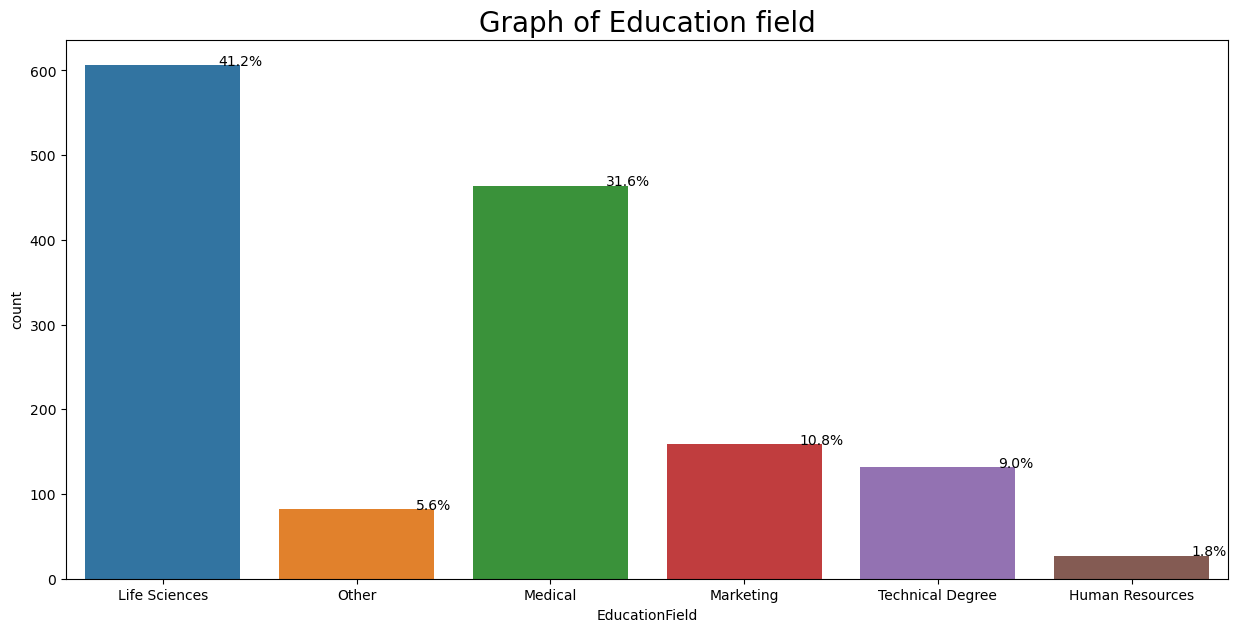

In [22]:
count(df, "EducationField", "Graph of Education field")

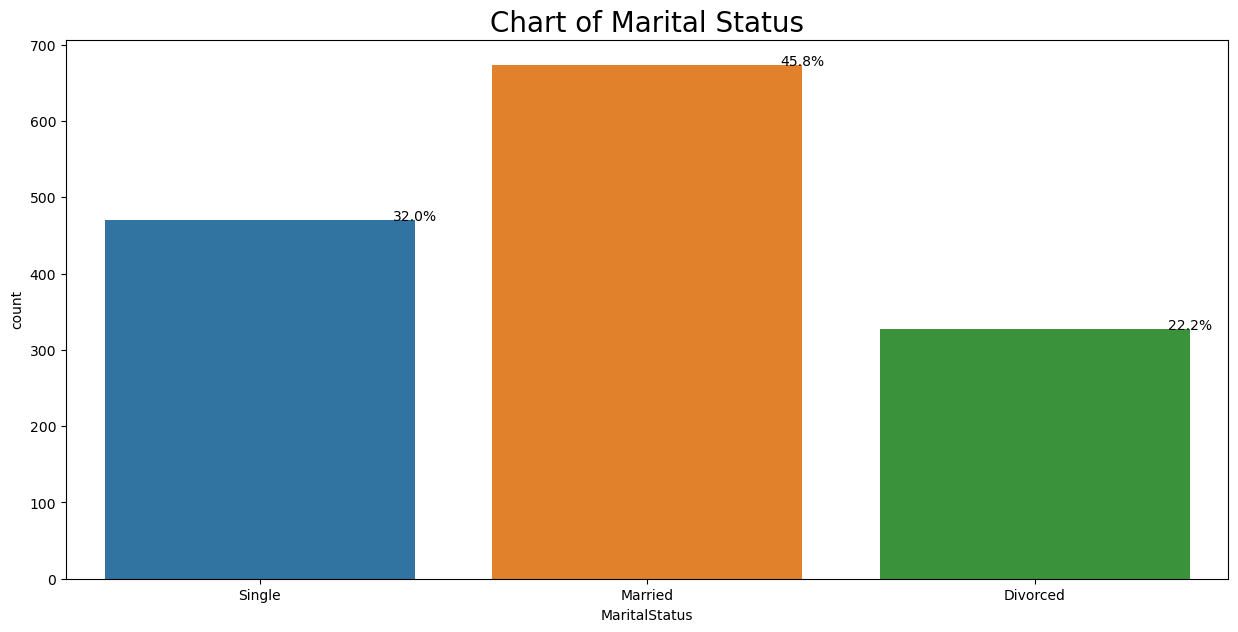

In [23]:
count(df, 'MaritalStatus', 'Chart of Marital Status')

In [24]:
def count(df, x="", title=""):
    plt.figure(figsize=[15,7])
    total=float(len(df[x]))
    ax=sns.countplot(x=x, data=df, hue="Attrition")
    plt.title(title, fontsize=20)
    for p in ax.patches:
        percentage= '{:.1f}%'.format(100*p.get_height()/total)
        x=p.get_x() + p.get_width()
        y=p.get_height()
        ax.annotate(text=percentage, xy=(x, y), ha="center")
    plt.show()

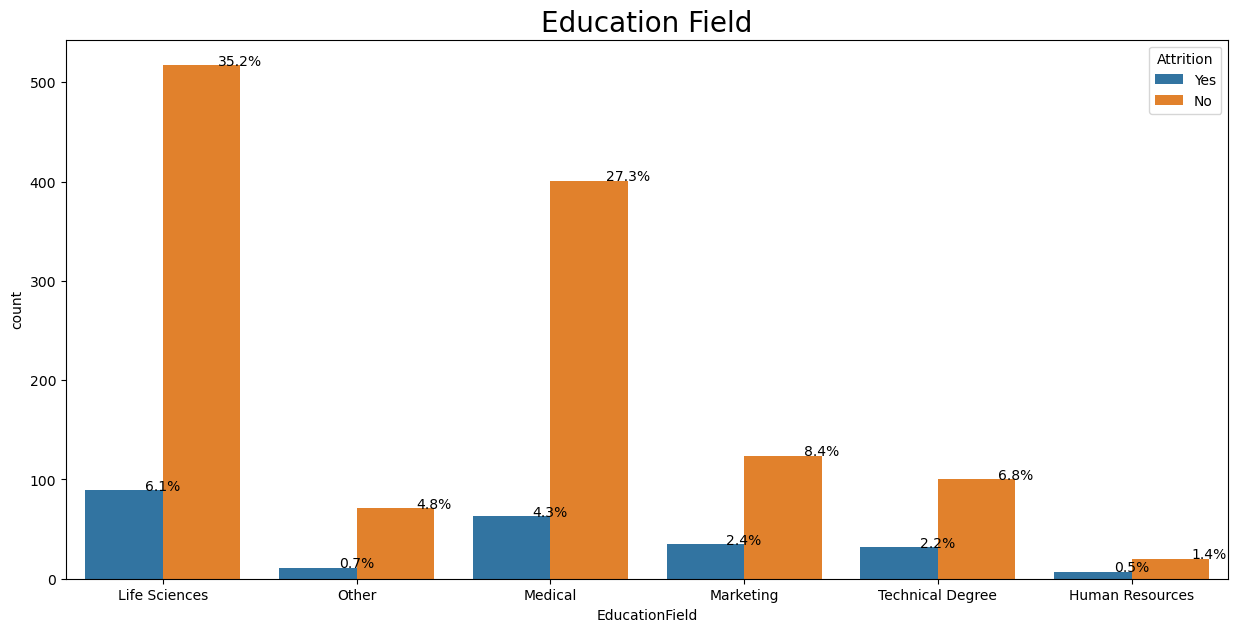

In [25]:
count(df, "EducationField", "Education Field")

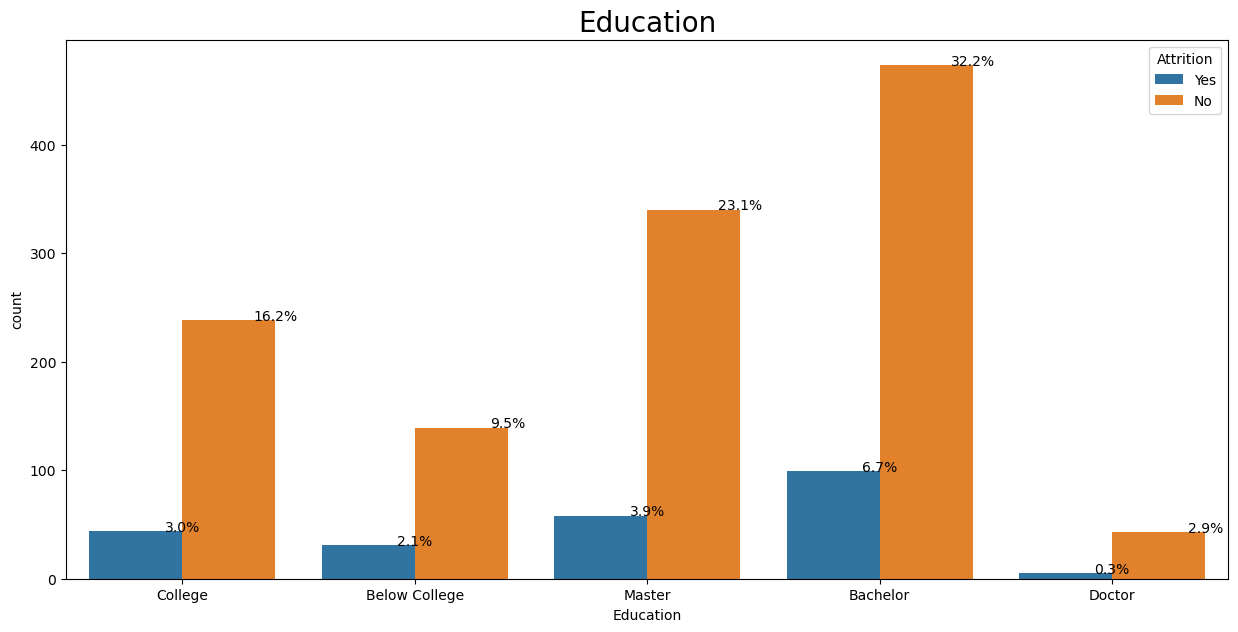

In [26]:
count(df, "Education", "Education")

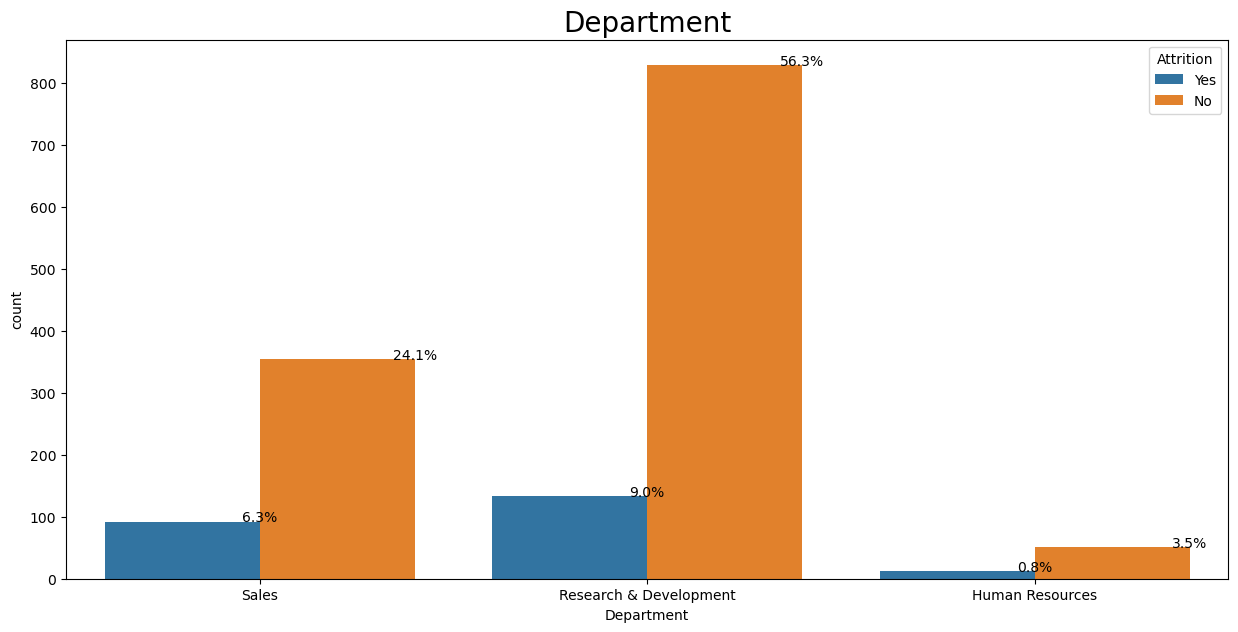

In [27]:
count(df, "Department", "Department")

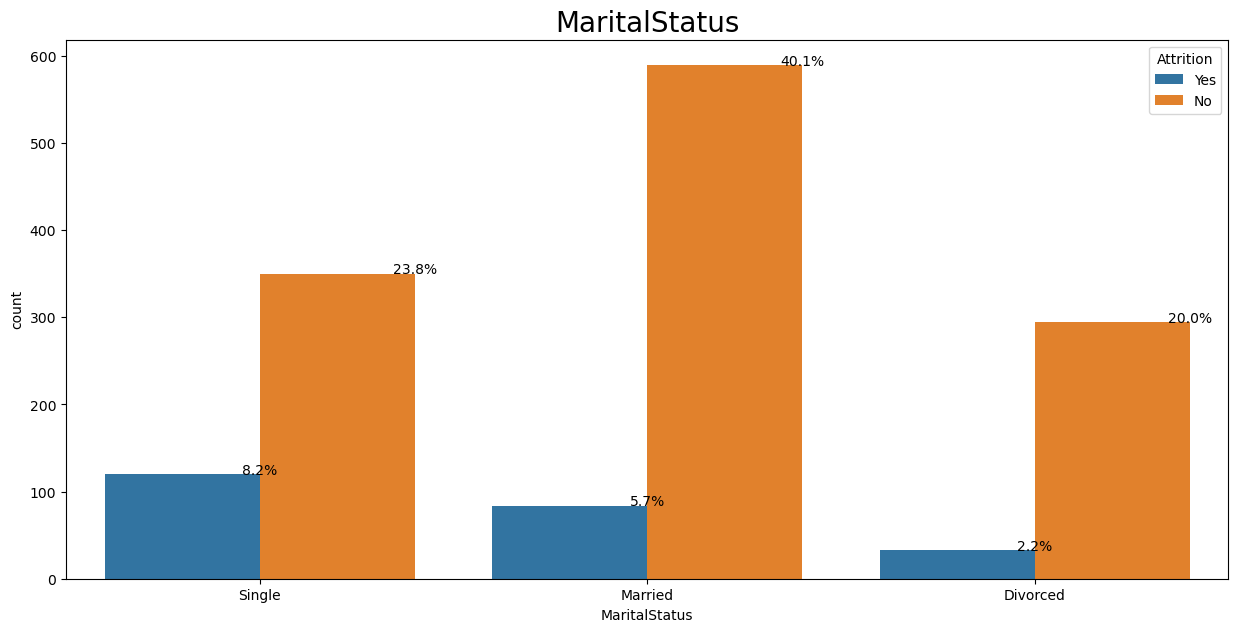

In [28]:
count(df, 'MaritalStatus', 'MaritalStatus')

###### -- Bulid a model to predict which employees are likely to attrite

In [29]:
encoder=LabelEncoder()
df["MaritalStatus"]=encoder.fit_transform(df["MaritalStatus"])
df["EducationField"]=encoder.fit_transform(df["EducationField"])
df["Department"]=encoder.fit_transform(df["Department"])
df['Attrition']=encoder.fit_transform(df['Attrition'])
df['Education']=encoder.fit_transform(df['Education'])
df['EnvironmentSatisfaction']=encoder.fit_transform(df['EnvironmentSatisfaction'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   Attrition                1470 non-null   int32
 2   Department               1470 non-null   int32
 3   DistanceFromHome         1470 non-null   int64
 4   Education                1470 non-null   int32
 5   EducationField           1470 non-null   int32
 6   EnvironmentSatisfaction  1470 non-null   int32
 7   JobSatisfaction          1470 non-null   int64
 8   MaritalStatus            1470 non-null   int32
 9   MonthlyIncome            1470 non-null   int64
 10  NumCompaniesWorked       1470 non-null   int64
 11  WorkLifeBalance          1470 non-null   int64
 12  YearsAtCompany           1470 non-null   int64
dtypes: int32(6), int64(7)
memory usage: 115.0 KB


In [30]:
X=df.drop(columns=['Attrition'])
y=df.Attrition

In [31]:
x_train, x_test, y_train, y_test=train_test_split(X,y, random_state=1, test_size=0.2)

In [32]:
x_train.shape

(1176, 12)

In [33]:
y_train.shape

(1176,)

In [34]:
lr=LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\JOSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_pred=lr.predict(x_test)


In [36]:
accuracy=accuracy_score(y_pred, y_test)
accuracy

0.7993197278911565

In [37]:
pca=PCA(n_components=0.95)
pca.fit(x_train)

PCA(n_components=0.95)

In [38]:
new_xtrain=pca.transform(x_train)
new_xtest=pca.transform(x_test)

In [39]:
lr=LogisticRegression(penalty='l2')
lr.fit(new_xtrain, y_train)

LogisticRegression()

In [40]:
y_pred=lr.predict(new_xtest)

In [41]:
acc=accuracy_score(y_test, y_pred)

In [42]:
acc

0.8027210884353742